# Social Cost of Carbon

In [1]:
%matplotlib inline

In [2]:
import fair

In [3]:
import numpy as np
from scipy.integrate import simps
import scipy

from matplotlib import pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = (16, 9)

## Read in Data Files & Running FaIR

In [4]:
## Read in data files for RCF 3.0 and 8.5 Wm^{-2}
from fair.RCPs import rcp3pd, rcp85

In [5]:
## combine emissions from FossilCO2 and OtherCO2

CO2_rcp3pd = []
for i in range(len(rcp3pd.Emissions.emissions)):
    CO2_rcp3pd.append(rcp3pd.Emissions.emissions[i][1]+rcp3pd.Emissions.emissions[i][2])
CO2_rcp3pd_array = np.asarray(CO2_rcp3pd)


CO2_rcp85 = []
for i in range(len(rcp85.Emissions.emissions)):
    CO2_rcp85.append(rcp85.Emissions.emissions[i][1]+rcp85.Emissions.emissions[i][2])
CO2_rcp85_array = np.asarray(CO2_rcp85)

In [6]:
## run FaIR for unperturbed scenarios

C26, F26, T26 = fair.forward.fair_scm(emissions=CO2_rcp3pd_array, useMultigas=False)
C85, F85, T85 = fair.forward.fair_scm(emissions=CO2_rcp85_array, useMultigas=False)

In [7]:
## set perturbation of CO2 in Gt and year of perturbation

CO2_perturbation_GtC = 100  # 100 used in Myles' presentation and 10**(-9) for SCC
year_of_perturbation = 2020  # 2020 used in Myles' presentation; range [1765, 2500]

CO2_rcp3pd_array_perturb = CO2_rcp3pd_array
for i in range(len(rcp3pd.Emissions.year)):
    if rcp3pd.Emissions.year[i] == year_of_perturbation:
        CO2_rcp3pd_array_perturb[i] += CO2_perturbation_GtC

CO2_rcp85_array_perturb = CO2_rcp85_array
for i in range(len(rcp85.Emissions.year)):
    if rcp85.Emissions.year[i] == year_of_perturbation:
        CO2_rcp85_array_perturb[i] += CO2_perturbation_GtC

In [8]:
## run FaIR for perturbed scenarios

C26_perturb, F26_perturb, T26_perturb = fair.forward.fair_scm(emissions=CO2_rcp3pd_array_perturb, useMultigas=False)
C85_perturb, F85_perturb, T85_perturb = fair.forward.fair_scm(emissions=CO2_rcp85_array_perturb, useMultigas=False)

## Plots

### Temperature Response to CO2 Injection

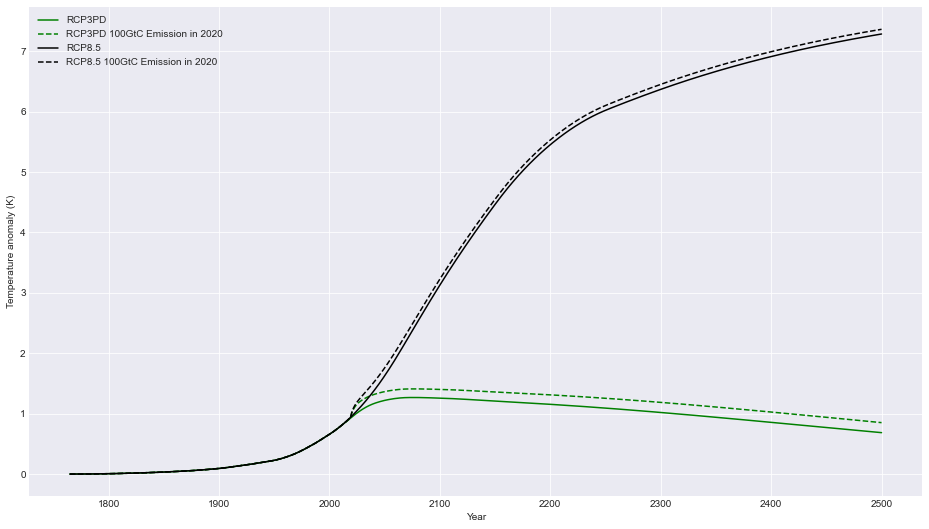

In [9]:
plt.plot(rcp3pd.Emissions.year, T26, color='green', label='RCP3PD')
plt.plot(rcp3pd.Emissions.year, T26_perturb, color='green', linestyle='dashed', label='RCP3PD 100GtC Emission in 2020')
plt.plot(rcp85.Emissions.year, T85, color='black', label='RCP8.5')
plt.plot(rcp85.Emissions.year, T85_perturb, color='black', linestyle='dashed', label='RCP8.5 100GtC Emission in 2020')

# plt.xlim(2000,2100)
# plt.ylim(0,3.5)
plt.xlabel("Year")
plt.ylabel("Temperature anomaly (K)")
plt.legend()

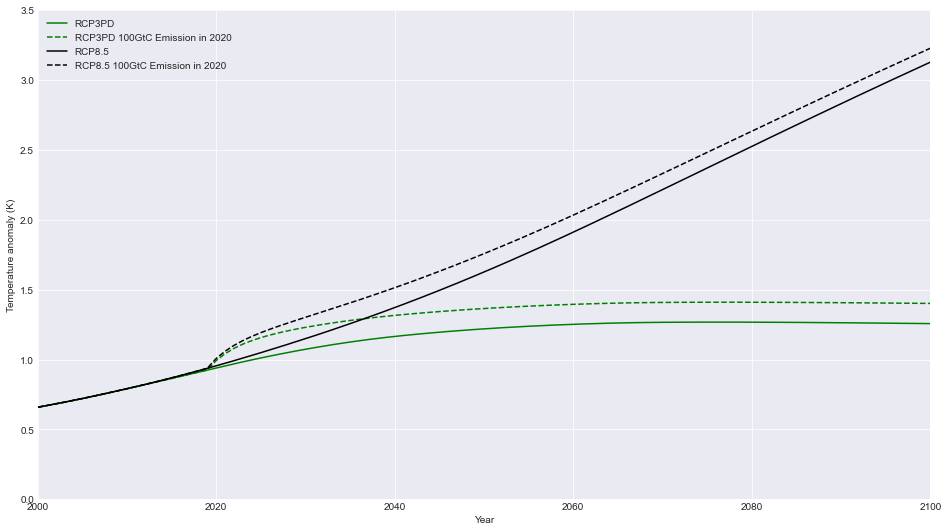

In [10]:
plt.plot(rcp3pd.Emissions.year, T26, color='green', label='RCP3PD')
plt.plot(rcp3pd.Emissions.year, T26_perturb, color='green', linestyle='dashed', label='RCP3PD 100GtC Emission in 2020')
plt.plot(rcp85.Emissions.year, T85, color='black', label='RCP8.5')
plt.plot(rcp85.Emissions.year, T85_perturb, color='black', linestyle='dashed', label='RCP8.5 100GtC Emission in 2020')

plt.xlim(2000,2100)
plt.ylim(0,3.5)
plt.xlabel("Year")
plt.ylabel("Temperature anomaly (K)")
plt.legend()

### Climate Damages as a Fraction of GDP

Text(0, 0.5, 'Damages / total annual consumption')

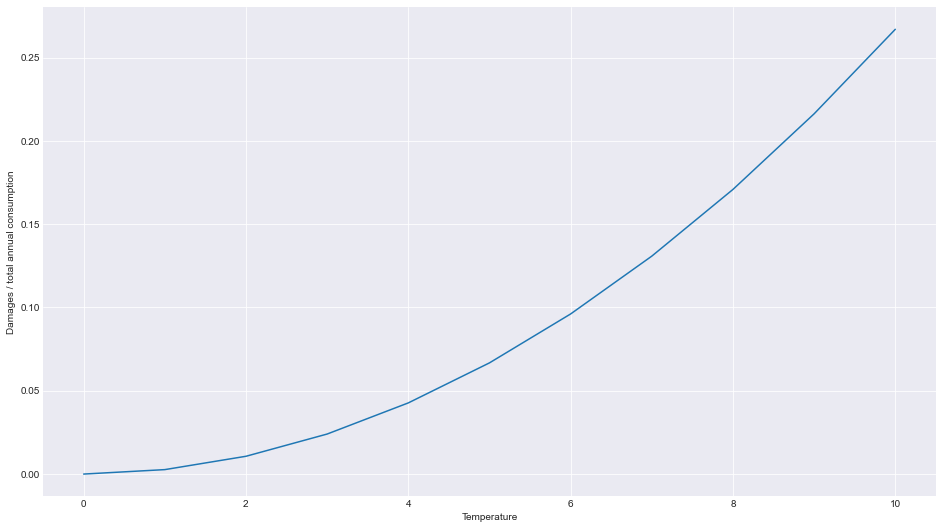

In [11]:
## values for D0 and gamma are taken from the end of Myles' 2016 paper

gamma = 2
D0 = 0.00267
T = np.arange(11)

S_Wt = D0*T**gamma
plt.plot(T, S_Wt)
plt.xlabel("Temperature")
plt.ylabel("Damages / total annual consumption")

### Global Economic Impact of Climate Change + CO2 Injection

In [12]:
S_Wt_26 = D0*T26**gamma
S_Wt_26_perturb = D0*T26_perturb**gamma
S_Wt_85 = D0*T85**gamma
S_Wt_85_perturb = D0*T85_perturb**gamma

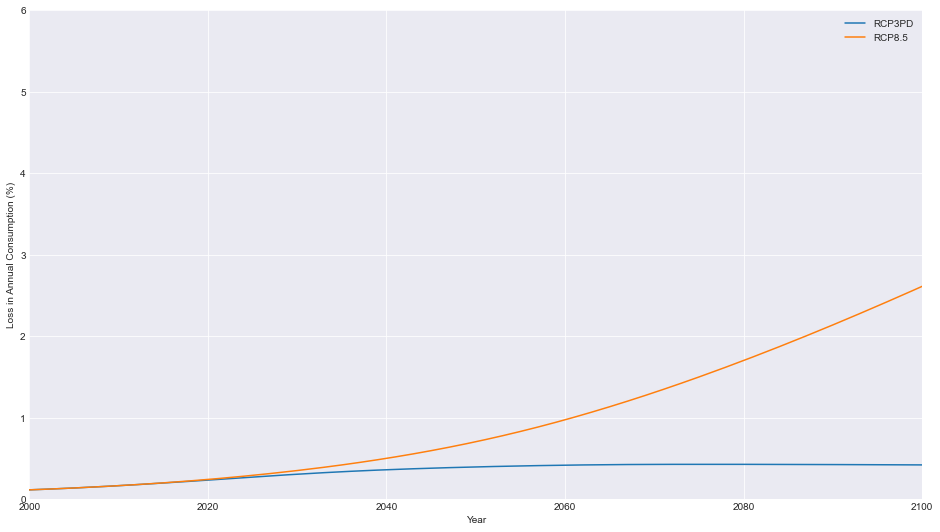

In [13]:
plt.plot(rcp3pd.Emissions.year, S_Wt_26*100, label='RCP3PD')
plt.plot(rcp3pd.Emissions.year, S_Wt_85*100, label='RCP8.5')

plt.xlim(2000, 2100)
plt.ylim(0, 6)
plt.xlabel("Year")
plt.ylabel("Loss in Annual Consumption (%)")
plt.legend()

# note: Myles' presentation shows that the choice of gamma and D0 is important

### Global Economic Impact due to CO2 Injection

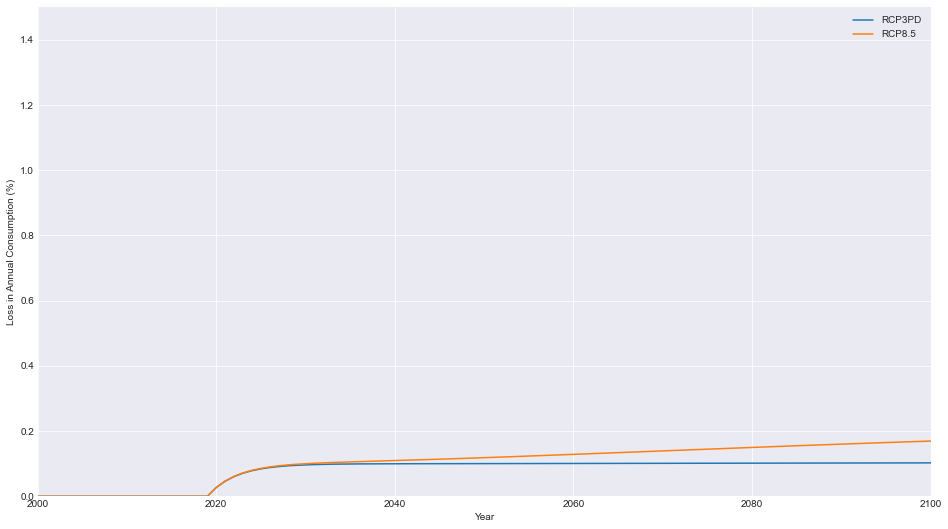

In [14]:
consumption_loss_fraction_26 = S_Wt_26_perturb-S_Wt_26
consumption_loss_fraction_85 = S_Wt_85_perturb-S_Wt_85

plt.plot(rcp3pd.Emissions.year, consumption_loss_fraction_26*100, label='RCP3PD')
plt.plot(rcp3pd.Emissions.year, consumption_loss_fraction_85*100, label='RCP8.5')

plt.xlabel("Year")
plt.ylabel("Loss in Annual Consumption (%)")
plt.xlim(2000, 2100)
plt.ylim(0, 1.5)
plt.legend()

### Assumptions about the Future Size of the World Economy and the Discount Rate

In [15]:
## set annual consumption growth and annual consumption in the year 2020

consumption_growth = 1.02
W0 = 80
W = []

for i in range(len(rcp85.Emissions.year)):
    if rcp85.Emissions.year[i] == 2020:
        index_2020 = i

for i in range(len(rcp85.Emissions.year)):
    W.append(W0*consumption_growth**(i-index_2020))

W = np.asarray(W)

In [16]:
## set consumption discoutn rate and calculate the integrand

consumption_discount = 0.035
discount_function = np.zeros(len(rcp85.Emissions.year))

for i in range(len(rcp85.Emissions.year)):
    if rcp85.Emissions.year[i] == year_of_perturbation:
        index_year_of_perturbation = i

for i in range(len(discount_function)):
    if i >= index_year_of_perturbation:
        discount_function[i] = np.exp(-consumption_discount*(rcp85.Emissions.year[i]-year_of_perturbation))

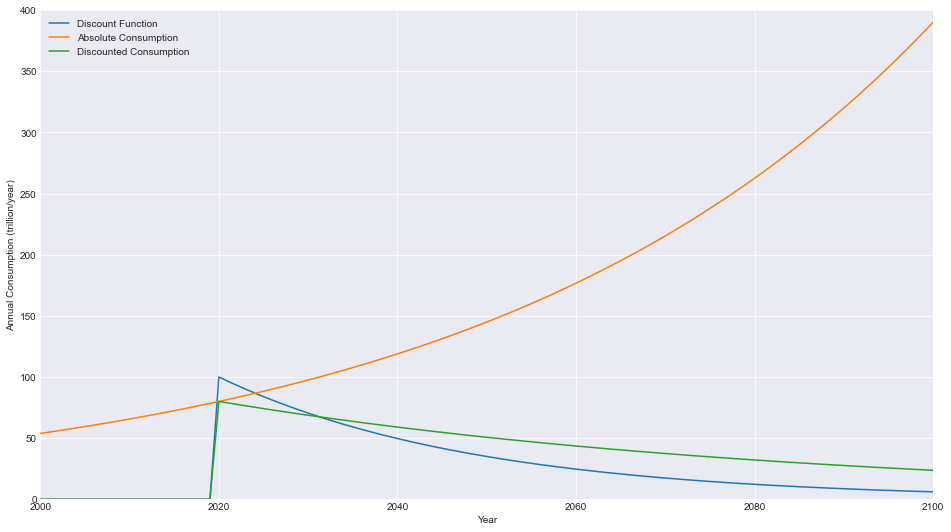

In [17]:
plt.plot(rcp85.Emissions.year, discount_function*100, label='Discount Function')
plt.plot(rcp85.Emissions.year, W, label='Absolute Consumption')
plt.plot(rcp85.Emissions.year, W*discount_function, label='Discounted Consumption')

plt.xlabel("Year")
plt.ylabel("Annual Consumption (trillion/year)")
plt.xlim(2000, 2100)
plt.ylim(0, 400)
plt.legend()

### Discounted and Absolute Impact of Injected CO2

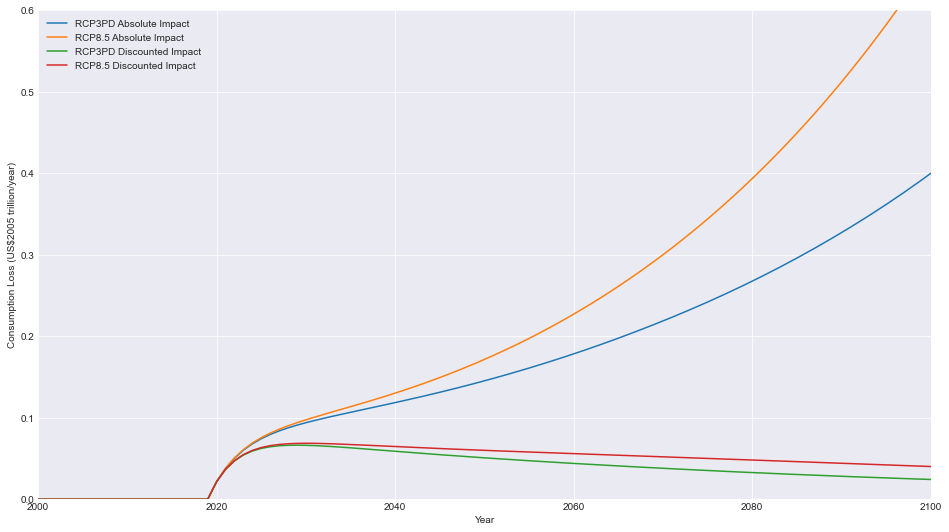

In [18]:
absolute_consumption_loss_26 = consumption_loss_fraction_26*W
absolute_consumption_loss_85 = consumption_loss_fraction_85*W
discounted_consumption_loss_26 = consumption_loss_fraction_26*W*discount_function
discounted_consumption_loss_85 = consumption_loss_fraction_85*W*discount_function

plt.plot(rcp3pd.Emissions.year, absolute_consumption_loss_26, label='RCP3PD Absolute Impact')
plt.plot(rcp3pd.Emissions.year, absolute_consumption_loss_85, label='RCP8.5 Absolute Impact')
plt.plot(rcp3pd.Emissions.year, discounted_consumption_loss_26, label='RCP3PD Discounted Impact')
plt.plot(rcp3pd.Emissions.year, discounted_consumption_loss_85, label='RCP8.5 Discounted Impact')

plt.xlabel("Year")
plt.ylabel("Consumption Loss (US$2005 trillion/year)")
plt.xlim(2000, 2100)
plt.ylim(0, 0.6)
plt.legend()

/var/folders/m4/mbpwp5q15070t8lqj4fj7mjr0000gn/T/ipykernel_87765/2148075009.py:6: DeprecationWarning: scipy.zeros is deprecated and will be removed in SciPy 2.0.0, use numpy.zeros instead
  d = scipy.zeros(len(discounted_consumption_loss_26))


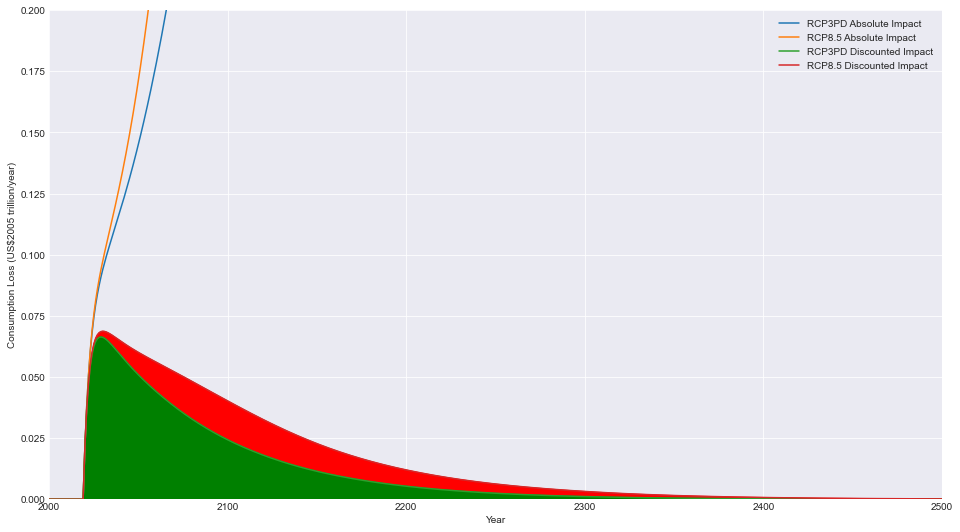

In [19]:
plt.plot(rcp3pd.Emissions.year, absolute_consumption_loss_26, label='RCP3PD Absolute Impact')
plt.plot(rcp3pd.Emissions.year, absolute_consumption_loss_85, label='RCP8.5 Absolute Impact')
plt.plot(rcp3pd.Emissions.year, discounted_consumption_loss_26, label='RCP3PD Discounted Impact')
plt.plot(rcp3pd.Emissions.year, discounted_consumption_loss_85, label='RCP8.5 Discounted Impact')

d = scipy.zeros(len(discounted_consumption_loss_26))
plt.fill_between(rcp3pd.Emissions.year,discounted_consumption_loss_85,where=discounted_consumption_loss_85>=d, color='red')
plt.fill_between(rcp3pd.Emissions.year,discounted_consumption_loss_26,where=discounted_consumption_loss_26>=d, color='green')

# plt.title("Economic Impact of 100GtC in 2020")
plt.xlabel("Year")
plt.ylabel("Consumption Loss (US$2005 trillion/year)")
plt.xlim(2000, 2500)
plt.ylim(0, 0.2)
plt.legend()

In [20]:
area_26 = simps(discounted_consumption_loss_26, dx=1)
area_85 = simps(discounted_consumption_loss_85, dx=1)

In [21]:
print(f"{area_26 = }")
print(f"{area_85 = }")

area_26 = 5.14931214678572
area_85 = 7.6551562786287795


In [22]:
# convert to dollar amount

print(area_26*10**12)
print(area_85*10**12)

5149312146785.72
7655156278628.779


In [23]:
# convert to Social Cost of Carbon Dioxide!!

print(area_26*10**1*12/44)
print(area_85*10**1*12/44)

14.043578582142873
20.877698941714854
